<a href="https://colab.research.google.com/github/yopinator/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Joseph_Kupec_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [0]:
print(cell_phones.isnull().sum())
print(population.isnull().sum())
print(geo_country_codes.isnull().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64
geo                 0
time                0
population_total    0
dtype: int64
geo        0
country    0
dtype: int64


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

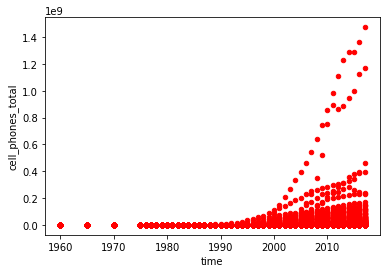

In [0]:
ax1 = cell_phones.plot.scatter(x='time', y='cell_phones_total', c='red')

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
phones_pop=pd.merge(cell_phones, population, on=['geo', 'time'], how='inner')
phones_pop


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299
...,...,...,...,...
8585,zwe,2013,13633167.0,15054506
8586,zwe,2014,11798652.0,15411675
8587,zwe,2015,12757410.0,15777451
8588,zwe,2016,12878926.0,16150362


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
geo_country_codes

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
...,...,...
268,yem_south,South Yemen (former)
269,yug,Yugoslavia
270,zaf,South Africa
271,zmb,Zambia


In [0]:
cols=['geo', 'country']
geo_country_codes=geo_country_codes[cols]

In [0]:
df3=pd.merge(phones_pop, geo_country_codes, on='geo', how='inner')
df3

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan
...,...,...,...,...,...
8585,zwe,2013,13633167.0,15054506,Zimbabwe
8586,zwe,2014,11798652.0,15411675,Zimbabwe
8587,zwe,2015,12757410.0,15777451,Zimbabwe
8588,zwe,2016,12878926.0,16150362,Zimbabwe


In [0]:
df3['population_total'] = df3['population_total'].astype(float)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:

phones_per_p = df3['cell_phones_total']/df3['population_total']
df3['phones_per_p'] = phones_per_p
df3

,geo,time,cell_phones_total,population_total,country,phones_per_p
0,afg,1960,0.0,8996351.0,Afghanistan,0.000000
1,afg,1965,0.0,9938414.0,Afghanistan,0.000000
2,afg,1970,0.0,11126123.0,Afghanistan,0.000000
3,afg,1975,0.0,12590286.0,Afghanistan,0.000000
4,afg,1976,0.0,12840299.0,Afghanistan,0.000000
...,...,...,...,...,...,...
8585,zwe,2013,13633167.0,15054506.0,Zimbabwe,0.905587
8586,zwe,2014,11798652.0,15411675.0,Zimbabwe,0.765566
8587,zwe,2015,12757410.0,15777451.0,Zimbabwe,0.808585
8588,zwe,2016,12878926.0,16150362.0,Zimbabwe,0.797439


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
df3.describe(include='all')

,geo,time,cell_phones_total,population_total,country,phones_per_p
count,8590,8590.000000,8.590000e+03,8.590000e+03,8590,8590.000000
unique,195,NaN,NaN,NaN,195,NaN
top,phl,NaN,NaN,NaN,Bolivia,NaN
freq,46,NaN,NaN,NaN,46,NaN
mean,NaN,1994.193481,9.004950e+06,2.983823e+07,NaN,0.279639
std,NaN,14.257975,5.573408e+07,1.161284e+08,NaN,0.454247
min,NaN,1960.000000,0.000000e+00,4.433000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.456148e+06,NaN,0.000000
50%,NaN,1995.000000,6.200000e+03,5.725062e+06,NaN,0.001564
75%,NaN,2006.000000,1.697652e+06,1.810581e+07,NaN,0.461149


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
df3.sort_values(by='cell_phones_total', ascending=False)
#lets try something else

,geo,time,cell_phones_total,population_total,country,phones_per_p
1496,chn,2017,1.474097e+09,1.409517e+09,China,1.045817
1495,chn,2016,1.364934e+09,1.403500e+09,China,0.972521
1494,chn,2015,1.291984e+09,1.397029e+09,China,0.924809
1493,chn,2014,1.286093e+09,1.390110e+09,China,0.925173
1492,chn,2013,1.229113e+09,1.382793e+09,China,0.888862
...,...,...,...,...,...,...
3025,gnb,1998,0.000000e+00,1.199915e+06,Guinea-Bissau,0.000000
3024,gnb,1997,0.000000e+00,1.179727e+06,Guinea-Bissau,0.000000
3023,gnb,1996,0.000000e+00,1.159060e+06,Guinea-Bissau,0.000000
3022,gnb,1995,0.000000e+00,1.137122e+06,Guinea-Bissau,0.000000


In [0]:
df4 = df3[df3['time'] >= 2017]

In [0]:
df4.sort_values(by='cell_phones_total', ascending=False)


,geo,time,cell_phones_total,population_total,country,phones_per_p
1496,chn,2017,1.474097e+09,1.409517e+09,China,1.045817
3595,ind,2017,1.168902e+09,1.339180e+09,India,0.872849
3549,idn,2017,4.589232e+08,2.639914e+08,Indonesia,1.738402
8134,usa,2017,3.958810e+08,3.244595e+08,United States,1.220125
1084,bra,2017,2.364885e+08,2.092883e+08,Brazil,1.129966
...,...,...,...,...,...,...
4596,lie,2017,4.662500e+04,3.792200e+04,Liechtenstein,1.229497
4220,kir,2017,4.612300e+04,1.163980e+05,Kiribati,0.396253
7005,smr,2017,3.800000e+04,3.340000e+04,San Marino,1.137725
4918,mco,2017,3.297800e+04,3.869500e+04,Monaco,0.852255


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
occ_per_yr = pd.crosstab(df['Occupation'],
            df['Year'],
            normalize='columns')
occ_per_yr

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.903614,0.739645,0.726115,0.622642,0.560241,0.384146,0.370370,0.360248,0.255319,0.207317,0.208589,0.351515,0.337423,0.268293,0.427711,0.392638,0.45
Government and Politics,0.012048,0.082840,0.038217,0.069182,0.102410,0.225610,0.160494,0.192547,0.170213,0.201220,0.208589,0.181818,0.165644,0.201220,0.126506,0.128834,0.17
Media,0.066265,0.124260,0.197452,0.264151,0.246988,0.274390,0.333333,0.291925,0.333333,0.469512,0.361963,0.303030,0.312883,0.317073,0.307229,0.325153,0.24
Other,0.018072,0.053254,0.038217,0.044025,0.090361,0.115854,0.135802,0.155280,0.241135,0.121951,0.220859,0.163636,0.184049,0.213415,0.138554,0.153374,0.14


### Part 2 — Recreate this explanatory visualization:



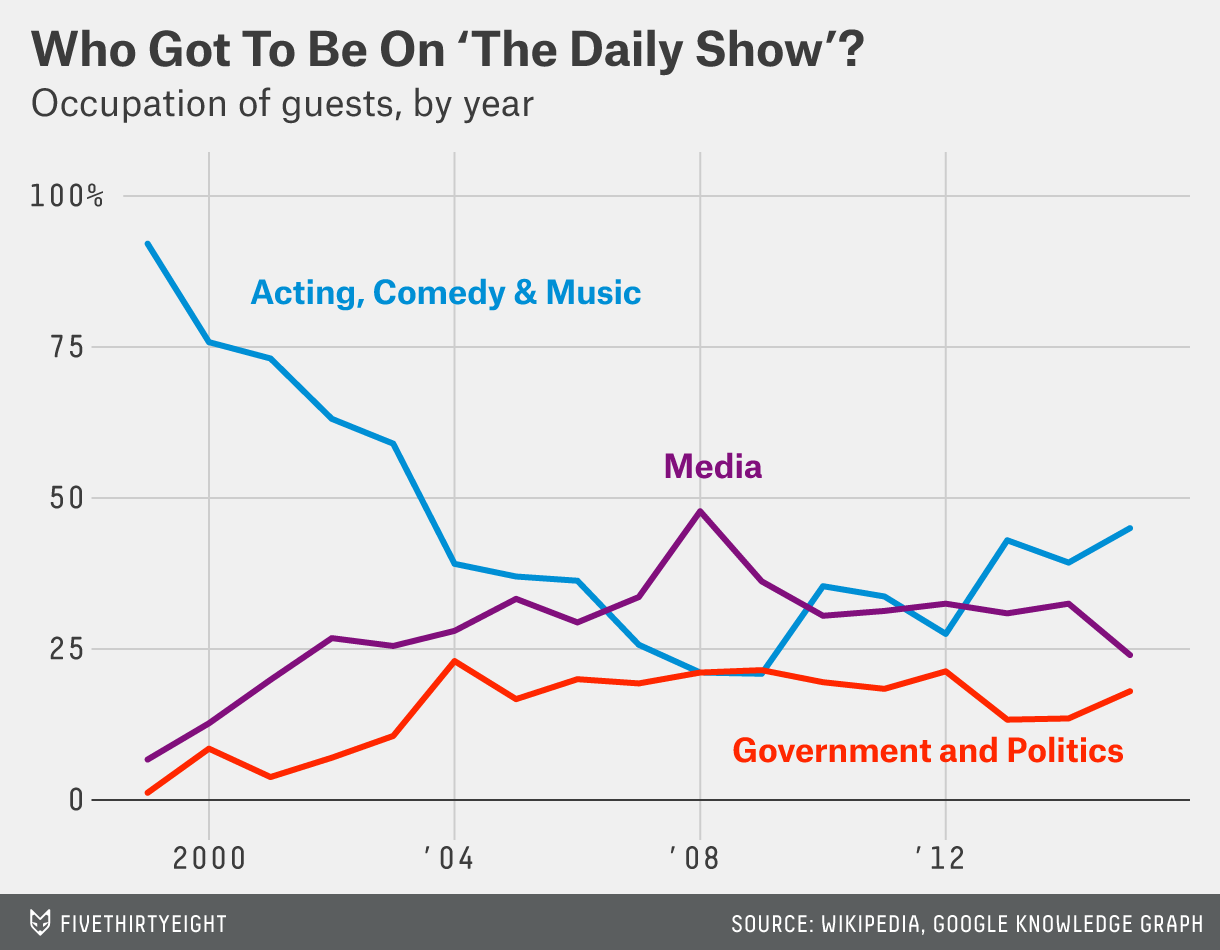

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [0]:
occ_per_yr

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.903614,0.739645,0.726115,0.622642,0.560241,0.384146,0.370370,0.360248,0.255319,0.207317,0.208589,0.351515,0.337423,0.268293,0.427711,0.392638,0.45
Government and Politics,0.012048,0.082840,0.038217,0.069182,0.102410,0.225610,0.160494,0.192547,0.170213,0.201220,0.208589,0.181818,0.165644,0.201220,0.126506,0.128834,0.17
Media,0.066265,0.124260,0.197452,0.264151,0.246988,0.274390,0.333333,0.291925,0.333333,0.469512,0.361963,0.303030,0.312883,0.317073,0.307229,0.325153,0.24
Other,0.018072,0.053254,0.038217,0.044025,0.090361,0.115854,0.135802,0.155280,0.241135,0.121951,0.220859,0.163636,0.184049,0.213415,0.138554,0.153374,0.14


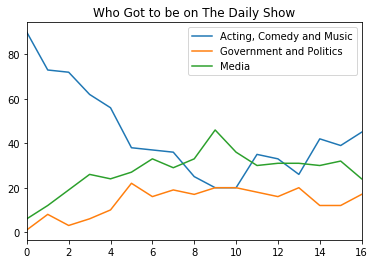

In [0]:
graph = pd.DataFrame({
    'Acting, Comedy and Music' : [90, 73, 72, 62, 56, 38, 37, 36, 25, 20, 20, 35, 33, 26, 42, 39, 45],
    'Government and Politics' : [1, 8, 3, 6, 10, 22, 16, 19, 17, 20, 20, 18, 16, 20, 12, 12, 17],
    'Media' : [6, 12, 19, 26, 24, 27, 33, 29, 33, 46, 36, 30, 31, 31, 30, 32, 24]})

lines = graph.plot.line(title='Who Got to be on The Daily Show')

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
